<a href="https://colab.research.google.com/github/YujinCHACHA/DNA_test1/blob/main/Dacon003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 모델수정 2

## 0. 준비


*   한글 폰트 적용

*   아래 셀 실행 후 런타임 다시 시작 런타임 모두 실행





In [ ]:
! sudo apt_get install -y fonts-nanum
! sudo fc-cache -fv
! rm ~/.cache/matplotlib -rf

sudo: apt_get: command not found
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded




*   라이브러리


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family = 'NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import sklearn

Mounted at /content/drive




*   데이터 로드



In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/3w 구내식당 식수예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/3w 구내식당 식수예측/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/3w 구내식당 식수예측/sample_submission.csv')

In [ ]:
train.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  월   2601      50     150             238          0.0   
1  2016-02-02  화   2601      50     173             319          0.0   
2  2016-02-03  수   2601      56     180             111          0.0   
3  2016-02-04  목   2601     104     220             355          0.0   
4  2016-02-05  금   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0

- 데이터 전처리
 - train

In [ ]:
# 석식 이용 인원 0 인 날 삭제
train = train[train['석식계']!= 0]

# 요일 숫자로 변경 
train.loc[train['요일']=='월','요일']=1
train.loc[train['요일']=='화','요일']=2
train.loc[train['요일']=='수','요일']=3
train.loc[train['요일']=='목','요일']=4
train.loc[train['요일']=='금','요일']=5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
train['월'] = train['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
train['일'] = train['일자'].map(day)

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  1   2601      50     150             238          0.0   
1  2016-02-02  2   2601      50     173             319          0.0   
2  2016-02-03  3   2601      56     180             111          0.0   
3  2016-02-04  4   2601     104     220             355          0.0   
4  2016-02-05  5   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  월  일  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2  1  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2  2  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2  3  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2  4  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2  5

In [ ]:
# 요일 숫자로 변경 
test.loc[test['요일']=='월','요일']=1
test.loc[test['요일']=='화','요일']=2
test.loc[test['요일']=='수','요일']=3
test.loc[test['요일']=='목','요일']=4
test.loc[test['요일']=='금','요일']=5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
test['월'] = test['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
test['일'] = test['일자'].map(day)

test.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  1   2601      50     150             238          0.0   
1  2016-02-02  2   2601      50     173             319          0.0   
2  2016-02-03  3   2601      56     180             111          0.0   
3  2016-02-04  4   2601     104     220             355          0.0   
4  2016-02-05  5   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  월  일  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2  1  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2  2  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2  3  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2  4  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2  5

# 1. EDA

###1)FEATURE를 주인공으로

In [ ]:
train

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0     2016-02-01  1   2601      50     150             238          0.0   
1     2016-02-02  2   2601      50     173             319          0.0   
2     2016-02-03  3   2601      56     180             111          0.0   
3     2016-02-04  4   2601     104     220             355          0.0   
4     2016-02-05  5   2601     278     181              34          0.0   
...          ... ..    ...     ...     ...             ...          ...   
1200  2021-01-20  3   2983      75     198               4        391.0   
1201  2021-01-21  4   2983      92     231             462        351.0   
1202  2021-01-22  5   2983     255     248               1        303.0   
1203  2021-01-25  1   2983     107     153             616        327.0   
1204  2021-01-26  2   2983      69     183             551        362.0   

                                                   조식메뉴  \
0     모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1     모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2     모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3     모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4     모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   
...                                                 ...   
1200  모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...   
1201  모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...   
1202  모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...   
1203  모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...   
1204  모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...   

                                                   중식메뉴  \
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2     카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   
...                                                 ...   
1200  쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...   
1201  쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...   
1202  전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...   
1203  쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...   
1204  쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...   

                                                   석식메뉴     중식계    석식계  월   일  
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2   1  
1     콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2   2  
2     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2   3  
3     미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2   4  
4     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2   5  
...                                                 ...     ...    ... ..  ..  
1200     김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치   1093.0  421.0  1  20  
1201            흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치    832.0  353.0  1  21  
1202        흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치    579.0  217.0  1  22  
1203            흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치   1145.0  502.0  1  25  
1204         (New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기   1015.0  480.0  1  26  

[1162 rows x 14 columns]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

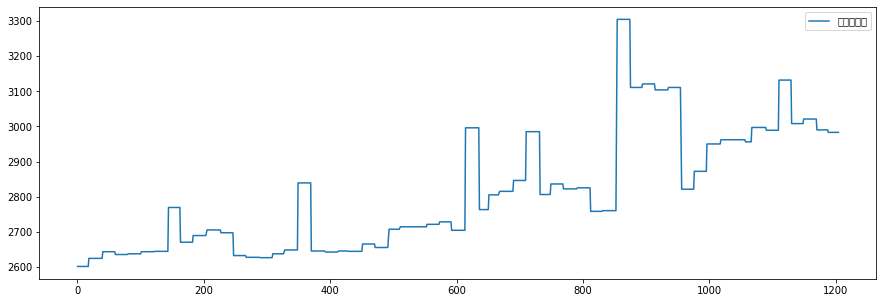

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

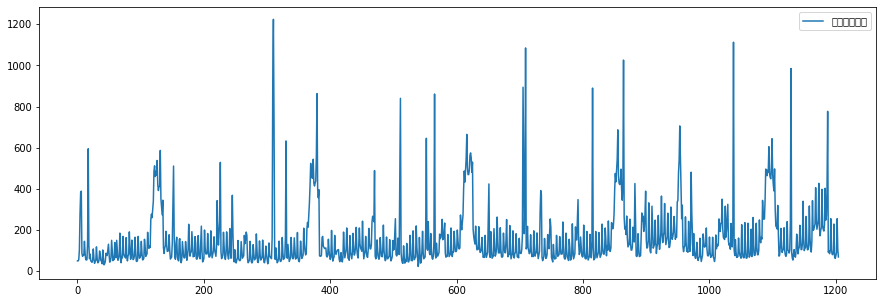

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

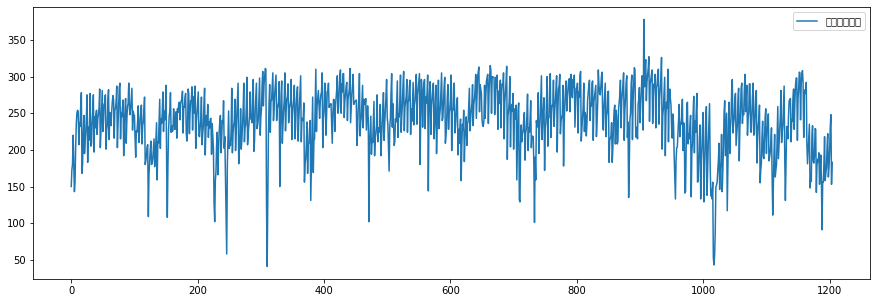

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_

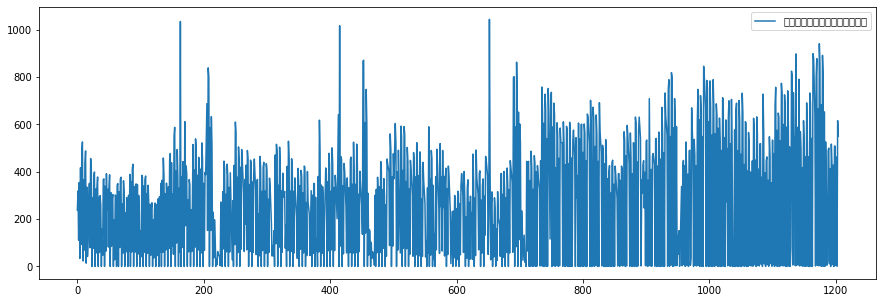

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_

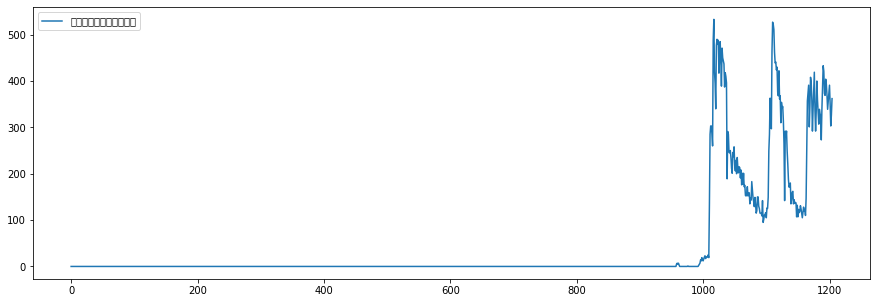

In [ ]:
train[['본사정원수']].plot(figsize =(15,5))
plt.show()

train[['본사휴가자수']].plot(figsize =(15,5))
plt.show()
train[['본사출장자수']].plot(figsize =(15,5))
plt.show()
train[['본사시간외근무명령서승인건수']].plot(figsize =(15,5))
plt.show()
train[['현본사소속재택근무자수']].plot(figsize =(15,5))
plt.show()

### a)재택근무발생원인

In [ ]:
train[train['현본사소속재택근무자수']>100] 

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
1010  2020-03-20  5   2950     176     263               3        135.0   
1011  2020-03-23  1   2950     109     178             687        285.0   
1012  2020-03-24  2   2950     131     137             639        303.0   
1013  2020-03-25  3   2950     122     146               1        303.0   
1014  2020-03-26  4   2950     133     133             584        288.0   
...          ... ..    ...     ...     ...             ...          ...   
1200  2021-01-20  3   2983      75     198               4        391.0   
1201  2021-01-21  4   2983      92     231             462        351.0   
1202  2021-01-22  5   2983     255     248               1        303.0   
1203  2021-01-25  1   2983     107     153             616        327.0   
1204  2021-01-26  2   2983      69     183             551        362.0   

                                                   조식메뉴  \
1010  모닝롤/허니브레드  우유/주스 계란후라이 야채죽/쌀밥 (쌀:국내산) 꽃게탕 (오징어...   
1011  모닝롤/베이글  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 감자국  꽈리고추...   
1012  모닝롤/햄치즈샌드  우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 쑥국  수제어묵볶...   
1013  모닝롤/고구마파이  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 피홍합탕  감...   
1014  모닝롤/바나나샌드  우유/주스 계란후라이 새송이죽/쌀밥 (쌀:국내산) 버섯매운탕 (...   
...                                                 ...   
1200  모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...   
1201  모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...   
1202  모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...   
1203  모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...   
1204  모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...   

                                                   중식메뉴  \
1010  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 갈비탕 (갈비:호주산) 칠리새우  감자채볶음 ...   
1011  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국  오리양념불고기*쌈무 (오리:국내산)...   
1012  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...   
1013  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국  목살스테이크 (목살:국내산) 파...   
1014  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국  제육볶음 (돈육:국내산) 계란찜 ...   
...                                                 ...   
1200  쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...   
1201  쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...   
1202  전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...   
1203  쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...   
1204  쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...   

                                                   석식메뉴     중식계    석식계  월   일  
1010  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 건새우아욱국  치즈함박스테이크 (돈육:국내,수...   627.0  358.0  3  20  
1011  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼  한식...  1110.0  651.0  3  23  
1012  오므라이스 (쌀:국내산) 가쯔오장국  돈육고구마강정 (돈육:국내산) 과일플레인샐러드...  1083.0  754.0  3  24  
1013             찹쌀밥  장각닭죽  생야채*쌈짱  오렌지  하루야채주스  포기김치    1022.0  526.0  3  25  
1014  멸치주먹밥 (쌀,현미흑미:국내산) 우동  해물까스*와사비소스  꽃맛살샐러드  무피클...   955.0  645.0  3  26  
...                                                 ...     ...    ... ..  ..  
1200     김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치   1093.0  421.0  1  20  
1201            흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치    832.0  353.0  1  21  
1202        흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치    579.0  217.0  1  22  
1203            흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치   1145.0  502.0  1  25  
1204         (New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기   1015.0  480.0  1  26  

[193 rows x 14 columns]

### b)본사 시간 외 근무 이상치 발생 원인

In [ ]:
train[train['본사시간외근무명령서승인건수']==0]['요일'].value_counts()

3    148
5     34
Name: 요일, dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

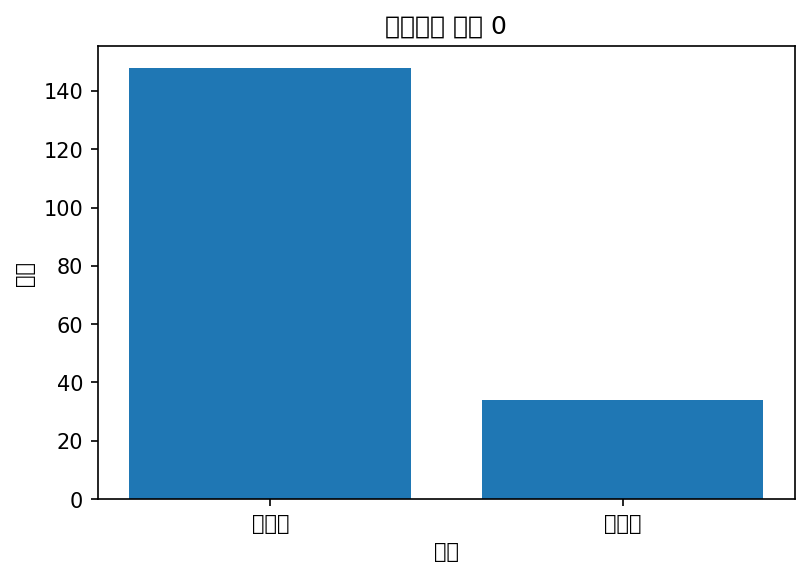

In [ ]:
x = ['수요일','금요일']
y = train[train['본사시간외근무명령서승인건수']==0]['요일'].value_counts().values

plt.figure(dpi = 150)

plt.title('야근하는 사람 0')
plt.xlabel('요일')
plt.ylabel('횟수')

plt.bar(x,y)
plt.show()

### 2)feature과 target의 상관관계

### a)중식계와 feature의 상관관계

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_

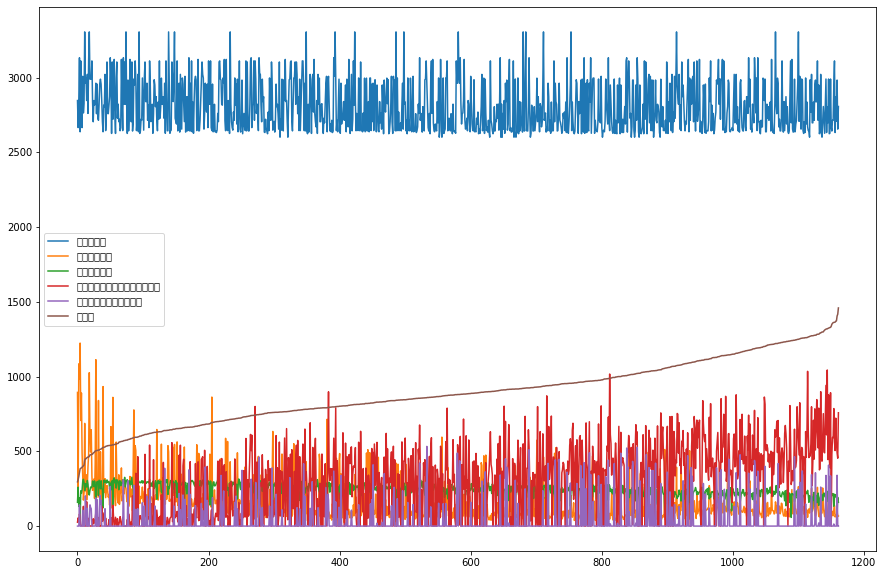

In [ ]:
train.sort_values(by='중식계')[['본사정원수', '본사휴가자수',       '본사출장자수',       '본사시간외근무명령서승인건수',       '현본사소속재택근무자수', '중식계']].reset_index(drop=True).plot(figsize = (15,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

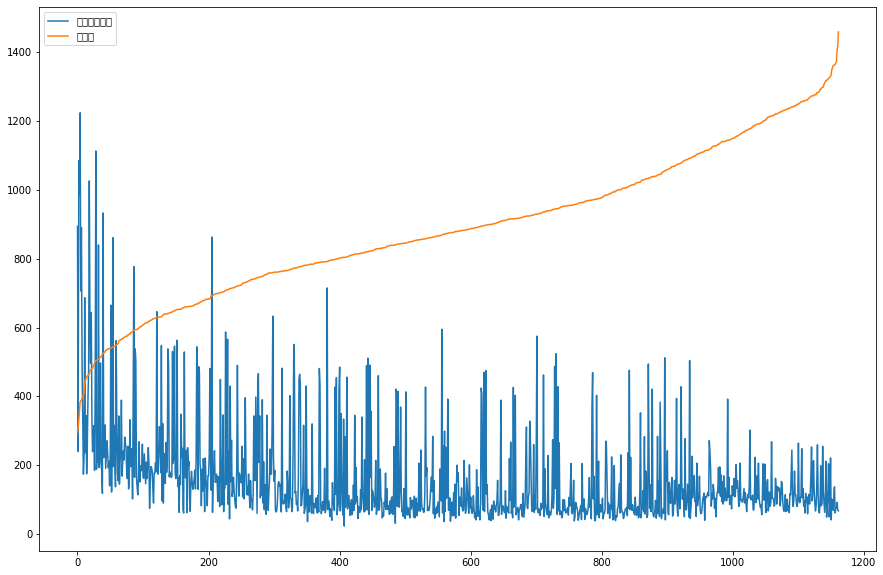

In [ ]:
#출장자수
train.sort_values(by='중식계')[['본사휴가자수','중식계']].reset_index(drop=True).plot(figsize = (15,10))

- 현재원
 - 본사정원수 - 본사휴가자수 - 본사출장자수- 재택근무

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_

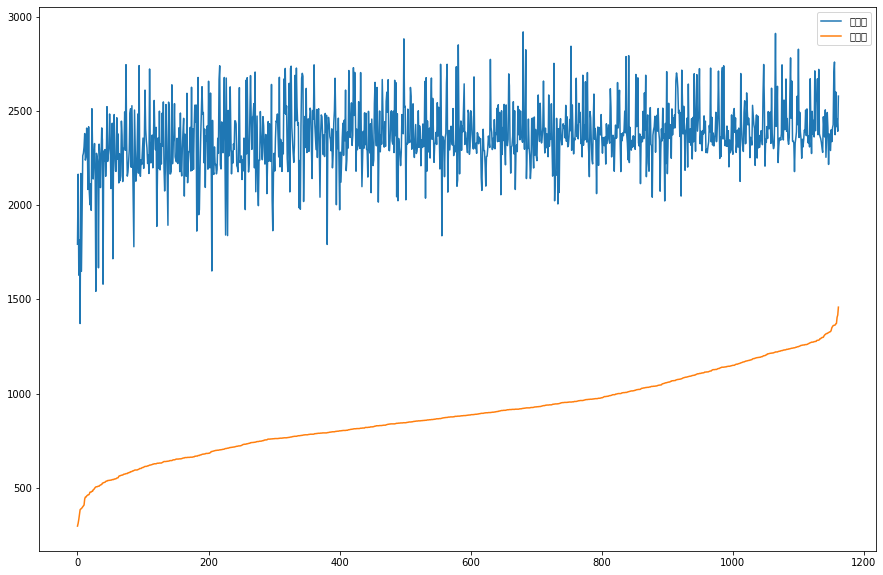

In [ ]:
train['현재원'] = train['본사정원수'] - train['본사휴가자수']- train['본사출장자수']- train['현본사소속재택근무자수']

train.sort_values(by='중식계')[['현재원','중식계']].reset_index(drop=True).plot(figsize = (15,10))
plt.show()

### b)석식계와 feature의 상관관계

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_

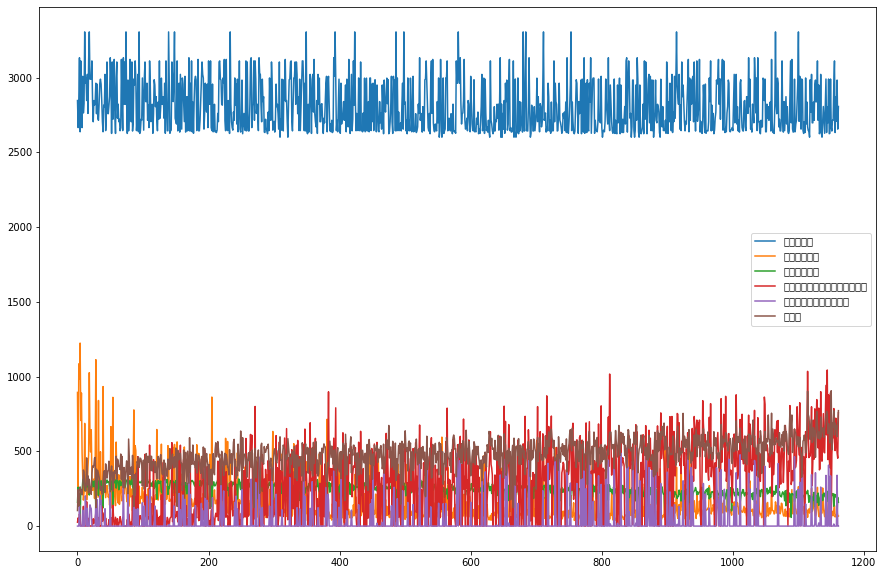

In [ ]:
train.sort_values(by='중식계')[['본사정원수', '본사휴가자수',       '본사출장자수',       '본사시간외근무명령서승인건수',       '현본사소속재택근무자수', '석식계']].reset_index(drop=True).plot(figsize = (15,10))

### 시간외근무

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_

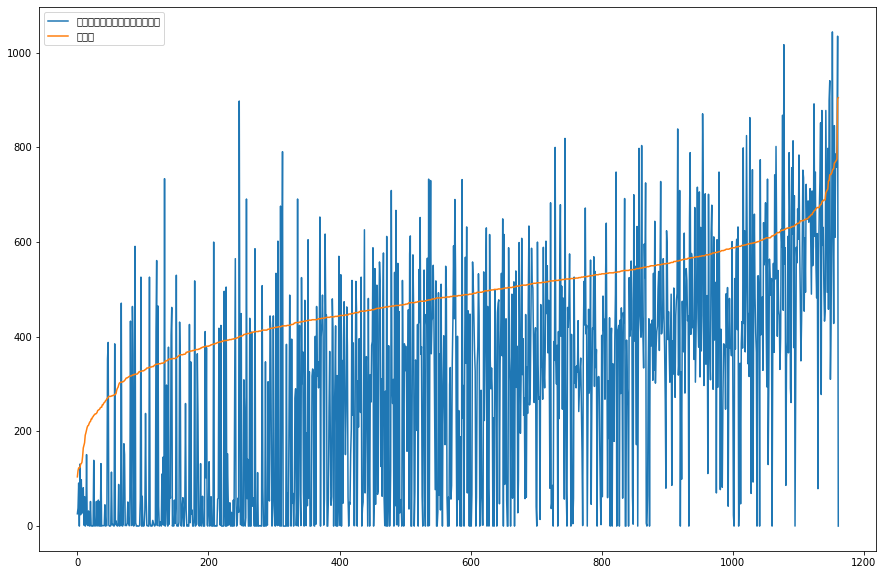

In [ ]:
train.sort_values(by='석식계')[['본사시간외근무명령서승인건수','석식계']].reset_index(drop=True).plot(figsize = (15,10))

In [ ]:
# target이 두개고 그 두 개의 target 간의 연관관계가 존재할지도?!?!?!!

### c) 중식계와 석식계의 상관관계

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_te

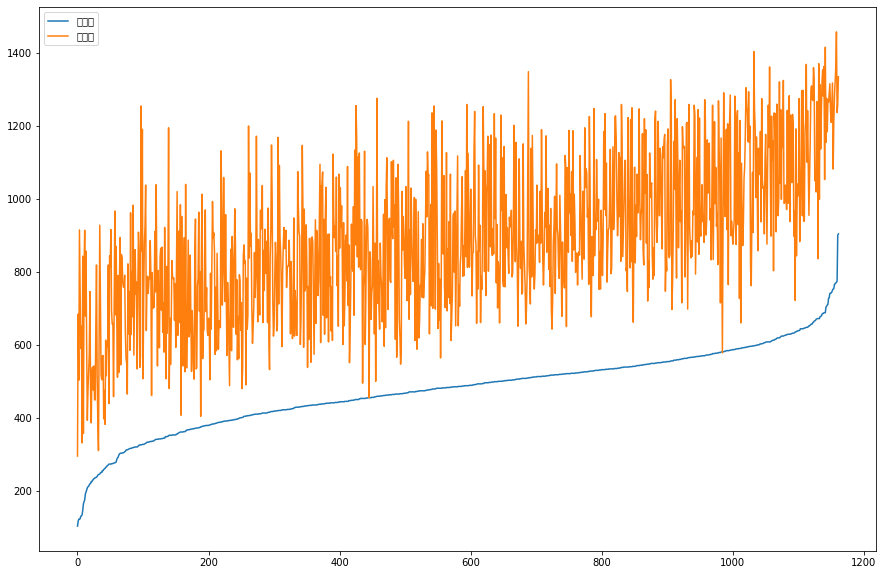

In [ ]:
train.sort_values(by='석식계')[['석식계','중식계']].reset_index(drop=True).plot(figsize = (15,10))
plt.show()



*   항목 추가
*   중식계와 석식계는 상관관계가 있다.



### 1) 본사 정원수는 target과 관계없다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_

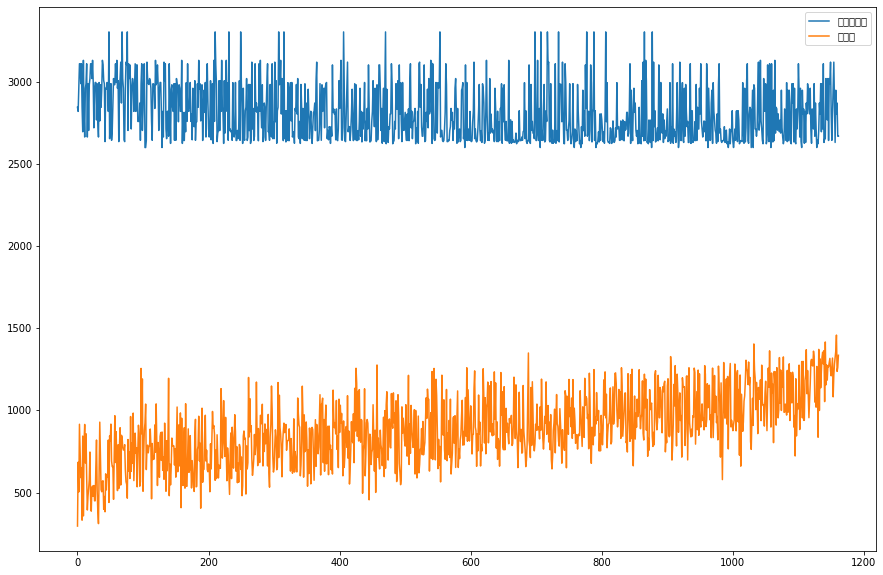

In [ ]:
train.sort_values(by='석식계')[['본사정원수','중식계']].reset_index(drop=True).plot(figsize = (15,10))
plt.show()

### 2) 본사 정원수는 현재원으로 활용이 가능하다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_

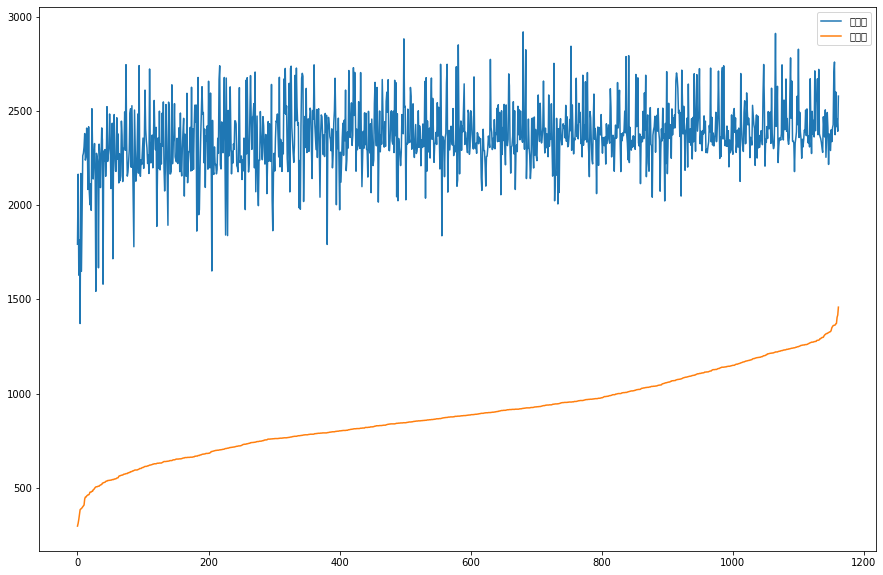

In [ ]:
train.sort_values(by='중식계')[['현재원','중식계']].reset_index(drop=True).plot(figsize = (15,10))
plt.show()

3) 중식계와 석식계는 상관관계가 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_te

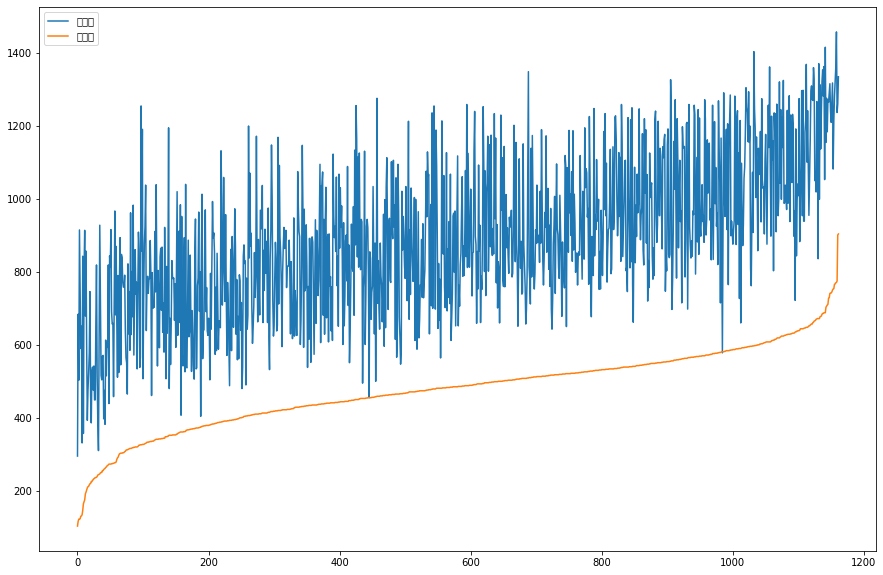

In [ ]:
train.sort_values(by='석식계')[['중식계','석식계']].reset_index(drop=True).plot(figsize = (15,10))
plt.show()

# 3. 인사이트를 바탕으로 모델 수정

In [ ]:
train

features = ['요일','월','일','현재원','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수',	'현본사소속재택근무자수'	]
train[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수
0     1  2   1  2401.0      50     150             238          0.0
1     2  2   2  2378.0      50     173             319          0.0
2     3  2   3  2365.0      56     180             111          0.0
3     4  2   4  2277.0     104     220             355          0.0
4     5  2   5  2142.0     278     181              34          0.0
...  .. ..  ..     ...     ...     ...             ...          ...
1200  3  1  20  2319.0      75     198               4        391.0
1201  4  1  21  2309.0      92     231             462        351.0
1202  5  1  22  2177.0     255     248               1        303.0
1203  1  1  25  2396.0     107     153             616        327.0
1204  2  1  26  2369.0      69     183             551        362.0

[1162 rows x 8 columns]

In [ ]:
test['현재원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']
test[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수
0     1  2   1  2401.0      50     150             238          0.0
1     2  2   2  2378.0      50     173             319          0.0
2     3  2   3  2365.0      56     180             111          0.0
3     4  2   4  2277.0     104     220             355          0.0
4     5  2   5  2142.0     278     181              34          0.0
...  .. ..  ..     ...     ...     ...             ...          ...
1200  3  1  20  2319.0      75     198               4        391.0
1201  4  1  21  2309.0      92     231             462        351.0
1202  5  1  22  2177.0     255     248               1        303.0
1203  1  1  25  2396.0     107     153             616        327.0
1204  2  1  26  2369.0      69     183             551        362.0

[1205 rows x 8 columns]

# 1)중식계 에측 모델


In [ ]:
features = ['요일', '월', '일', '현재원', '본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']

In [ ]:
X = train[features]
y = train['중식계']

from sklearn.tree import DecisionTreeRegressor
lunch_model = DecisionTreeRegressor()

lunch_model.fit(X,y)

lunch_count_predict =  lunch_model.predict(test[features])

In [ ]:
lunch_count_predict

array([ 988.91,  977.91,  581.81, 1210.21, 1044.43, 1029.2 ,  981.28,
        653.65, 1297.86, 1013.69,  823.06, 1250.45, 1117.45,  996.08,
        901.7 ,  663.87, 1224.5 , 1065.3 ,  950.57,  892.88,  591.25,
       1091.76,  998.27,  960.32,  649.  , 1262.4 , 1186.8 , 1026.61,
        924.26,  681.72, 1263.24,  998.21,  990.02,  893.95,  642.18,
       1225.68, 1013.74,  953.97,  912.75,  567.41, 1201.33,  995.13,
        981.7 ,  918.53,  653.64, 1198.79, 1020.91,  983.63,  893.05,
        639.97])

2) 석식계 예측 모델

In [ ]:
features = ['요일', '월', '일', '현재원', '본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']


In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
features.append('중식계')
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

In [ ]:
X = test[features]
y = test['석식계']

dinner_model = DecisionTreeRegressor()

dinner_model.fit(X, y)

dinner_count_predict = dinner_model.predict(test[features])

In [ ]:
test['중식계'] = lunch_count_predict
test[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계
0     1  2   1  2401.0      50     150             238          0.0  1039.0
1     2  2   2  2378.0      50     173             319          0.0   867.0
2     3  2   3  2365.0      56     180             111          0.0  1017.0
3     4  2   4  2277.0     104     220             355          0.0   978.0
4     5  2   5  2142.0     278     181              34          0.0   925.0
...  .. ..  ..     ...     ...     ...             ...          ...     ...
1200  3  1  20  2319.0      75     198               4        391.0  1093.0
1201  4  1  21  2309.0      92     231             462        351.0   832.0
1202  5  1  22  2177.0     255     248               1        303.0   579.0
1203  1  1  25  2396.0     107     153             616        327.0  1145.0
1204  2  1  26  2369.0      69     183             551        362.0  1015.0

[1205 rows x 9 columns]

4.변수중요도를 통한 가설검정

1) 중식계 변수중요도

In [ ]:
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

In [ ]:
features = features[:-1]

In [ ]:
lunch_model.feature_importances_

array([0.59043404, 0.03741343, 0.02664031, 0.04294803, 0.15089006,
       0.07449042, 0.06655618, 0.01062753])

In [ ]:
len(x)

9

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_

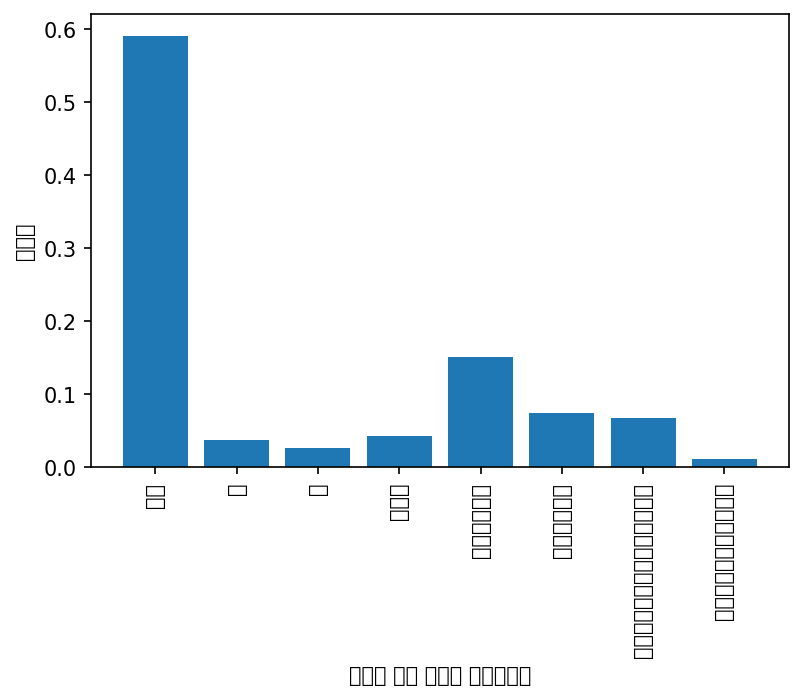

In [ ]:
x = train[features].columns
y = lunch_model.feature_importances_

plt.figure(dpi = 150)
plt.xticks(rotation = 90)

plt.xlabel('중식계 예측 모델의 변수중요도')
plt.ylabel('변수명')

plt.bar(x,y)
plt.show()

2) 석식계 변수중요도

In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
features.append('중식계')

In [ ]:
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_

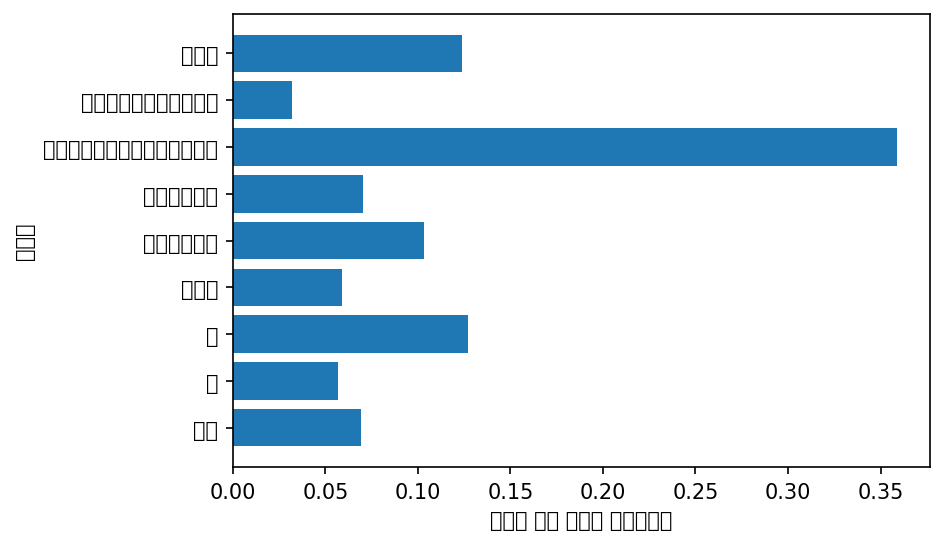

In [ ]:
x = train[features].columns
y = dinner_model.feature_importances_
plt.figure(dpi = 150)

plt.xlabel('석식계 예측 모델의 변수중요도')
plt.ylabel('변수명')

plt.barh(x,y)
plt.show

# 모델 선택, 모델 튜닝

## 1. 데이터 다시 로드, 전처리

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/3w 구내식당 식수예측/train.csv') 
test =  pd.read_csv('/content/drive/MyDrive/Dacon/3w 구내식당 식수예측/test.csv')
submissino =  pd.read_csv('/content/drive/MyDrive/Dacon/3w 구내식당 식수예측/sample_submission.csv')

In [ ]:
# 석식 이용 인원 0 인 날 삭제
train = train[train['석식계']!= 0]

# 요일 숫자로 변경 
train.loc[train['요일']=='월','요일']=1
train.loc[train['요일']=='화','요일']=2
train.loc[train['요일']=='수','요일']=3
train.loc[train['요일']=='목','요일']=4
train.loc[train['요일']=='금','요일']=5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
train['월'] = train['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
train['일'] = train['일자'].map(day)

# 현재원 칼럼 추가


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
train['현재원'] = train['본사정원수'] - train['본사휴가자수']- train['본사출장자수']- train['현본사소속재택근무자수']

In [ ]:

# 요일 숫자로 변경 
test.loc[test['요일']=='월','요일']=1
test.loc[test['요일']=='화','요일']=2
test.loc[test['요일']=='수','요일']=3
test.loc[test['요일']=='목','요일']=4
test.loc[test['요일']=='금','요일']=5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
test['월'] = test['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
test['일'] = test['일자'].map(day)

# 현재원 칼럼 추가


In [ ]:
test['현재원'] = test['본사정원수'] - test['본사휴가자수']- test['본사출장자수']- test['현본사소속재택근무자수']

##2. 랜덤포레스트 모델

1) 중식계 예측 모델

In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
features = features[:-1]
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수']

In [ ]:
X = train[features]
y = train['중식계']

from sklearn.ensemble import RandomForestRegressor

lunch_model = RandomForestRegressor()

lunch_model.fit(X,y)

lunch_count_predict = lunch_model.predict(test[features])

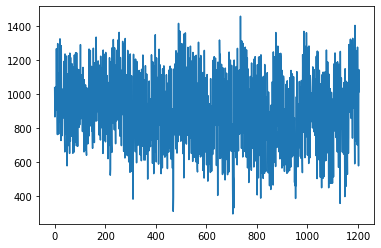

In [ ]:
plt.plot(lunch_count_predict)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz

estimator = lunch_model.estimators_[1]

export_graphviz(estimator, out_file='tree.dot',
                max_depth = 3,
                precision = 3,
                filled=True,
                rounded=True
                )

from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'decision-tree.png')


2) 석식계 예측 모델

In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수']

In [ ]:
features.append('중식계')
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '중식계']

In [ ]:
test['중식계'] = lunch_count_predict
test

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0   2021-01-27  3   2983      88     182               5        358.0   
1   2021-01-28  4   2983     104     212             409        348.0   
2   2021-01-29  5   2983     270     249               0        294.0   
3   2021-02-01  1   2924     108     154             538        322.0   
4   2021-02-02  2   2924      62     186             455        314.0   
5   2021-02-03  3   2924      59     199               5        286.0   
6   2021-02-04  4   2924      61     211             476        288.0   
7   2021-02-05  5   2924     169     252               0        256.0   
8   2021-02-08  1   2924      88     174             690        329.0   
9   2021-02-09  2   2924      94     183             542        329.0   
10  2021-02-10  3   2924     489     134               0        233.0   
11  2021-02-15  1   2924     178     131             795        355.0   
12  2021-02-16  2   2924      70     175             815        413.0   
13  2021-02-17  3   2924      77     181               3        379.0   
14  2021-02-18  4   2924      83     247             594        338.0   
15  2021-02-19  5   2924     176     268               1        280.0   
16  2021-02-22  1   2924     105     197             814        247.0   
17  2021-02-23  2   2924      75     200             783        233.0   
18  2021-02-24  3   2924      77     235               3        234.0   
19  2021-02-25  4   2924      91     252             585        235.0   
20  2021-02-26  5   2924     261     279               1        179.0   
21  2021-03-02  2   2975     139     166             781        248.0   
22  2021-03-03  3   2975      50     195               1        292.0   
23  2021-03-04  4   2975      72     236             746        263.0   
24  2021-03-05  5   2975     158     257               2        226.0   
25  2021-03-08  1   2975      97     170             939        264.0   
26  2021-03-09  2   2975      76     170            1003        282.0   
27  2021-03-10  3   2975      71     185               1        271.0   
28  2021-03-11  4   2975      93     223             609        261.0   
29  2021-03-12  5   2975     241     240               0        251.0   
30  2021-03-15  1   2975     126     148             864        314.0   
31  2021-03-16  2   2975      74     176             658        401.0   
32  2021-03-17  3   2975      90     192               4        371.0   
33  2021-03-18  4   2975     106     231             520        351.0   
34  2021-03-19  5   2975     253     255               0        266.0   
35  2021-03-22  1   2975     133     166             707        350.0   
36  2021-03-23  2   2975      82     205             688        349.0   
37  2021-03-24  3   2975      87     234               0        314.0   
38  2021-03-25  4   2975     118     260             441        297.0   
39  2021-03-26  5   2975     311     266               0        229.0   
40  2021-03-29  1   2975     121     178             660        318.0   
41  2021-03-30  2   2975      83     198             625        313.0   
42  2021-03-31  3   2975      86     217               0        317.0   
43  2021-04-01  4   2973      88     256             394        303.0   
44  2021-04-02  5   2973     275     272               0        224.0   
45  2021-04-05  1   2973     125     174             704        331.0   
46  2021-04-06  2   2973      76     170             636        364.0   
47  2021-04-07  3   2973      96     214               1        334.0   
48  2021-04-08  4   2973     105     238             509        324.0   
49  2021-04-09  5   2973     259     268               0        229.0   

                                                 조식메뉴  \
0   모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1   모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2   모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3   모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  

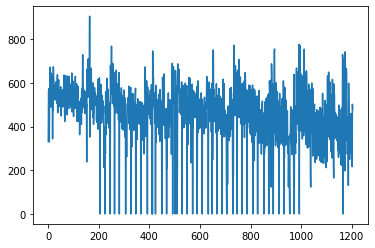

In [ ]:
X = train[features]
y = train['석식계']

from sklearn.ensemble import RandomForestRegressor

dininer_model = RandomForestRegressor()

dininer_model.fit(X,y)

dininer_count_predict = dininer_model.predict(test[features])

plt.plot(dinner_count_predict)
plt.show()

In [ ]:
len(lunch_count_predict)

50

In [ ]:
len(train)

1162

In [ ]:
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict[-50:]
submission.to_csv('submission3.csv',index = False)

5. 하이퍼파라미터 튜닝

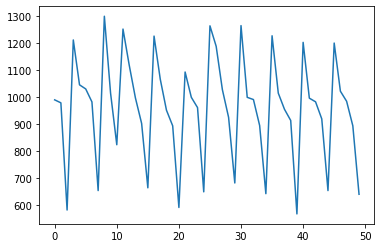

In [ ]:
features = features[:-1]

X = train[features]
y = train['중식계']

lunch_model = RandomForestRegressor(n_estimators = 200, criterion = 'absolute_error')

lunch_model.fit(X,y)

lunch_counth_predict = lunch_model.predict(test[features])

plt.plot(lunch_count_predict)
plt.show()

# 2)석식계 예측 모델

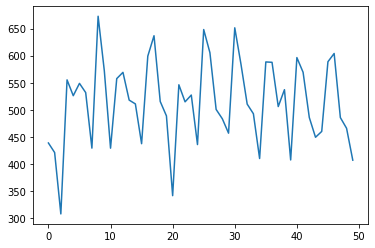

In [ ]:
features.append('중식계')

test['중식계'] = lunch_count_predict

X = train[features]
y = train['석식계']

dinner_model = RandomForestRegressor(n_estimators = 200, criterion = 'absolute_error')

dinner_model.fit(X,y)

dinner_count_predict = dinner_model.predict(test[features])

plt.plot(dinner_count_predict)
plt.show()

In [ ]:
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('submission.csv',index = False)

4. 텍스트 데이터 사용해보기

In [ ]:
train['중식메뉴'].loc[0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def find_something(text:str):
  if'두루치기' in text:
    return True
  else: 
    return False
x = ['두루치기','No 두루치기']
y = [train[train['중식메뉴'].map(find_something)['중식계'].mean().train[~train['중식메뉴'].map(find_something)]['중식계'].mean()]


SyntaxError: ignored

In [ ]:
     
plt.figure(dpi = 150)
plt.xlabel('메뉴')
plt.ylabel('중식계')
plt.bar(x,y)
plt.show()